In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
dataset_path = '/content/drive/MyDrive/Restaurant reviews.csv'

In [100]:
df=pd.read_csv(dataset_path, encoding = "ISO-8859-1")

In [101]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [103]:
df = df.drop(columns=["Restaurant","Reviewer","Metadata","Time","Pictures"])

In [106]:
y = df["Rating"]
X = df.drop(columns=["Rating", "7514"])
X.shape

(10000, 1)

In [107]:
X.head()

,Review
0,"The ambience was good, food was quite good . h..."
1,Ambience is too good for a pleasant evening. S...
2,A must try.. great food great ambience. Thnx f...
3,Soumen das and Arun was a great guy. Only beca...
4,Food is good.we ordered Kodi drumsticks and ba...


In [111]:
y = y.replace({'Like':3})
y.isnull().sum()
y = pd.to_numeric(y)
y = y.fillna(y.median())  

for i in range(0,len(y)):
    y.iloc[i] = round(y.iloc[i],0)

for i in range(0,len(y)):
    if (y[i]>=3):
        y[i] = 1
    else:
        y[i] = 0

y.unique()
y.shape

(10000,)

In [38]:
!pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]',' ', str(X['Review'][i]))
    review = review.lower() #Lowering the words is very imporatant in avoiding classifying same words as different words
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #Eleminating words that do not put much value in sentences.
    review = ' '.join(review) #Reconstructing sentences
    corpus.append(review)

In [ ]:
corpus_ = corpus.copy()
print(corpus_)

In [75]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [76]:
df = pd.read_csv(r"/content/drive/MyDrive/Restaurant reviews.csv", encoding ="latin-1")

In [78]:
comment_words = ''
stopwords = set(STOPWORDS)

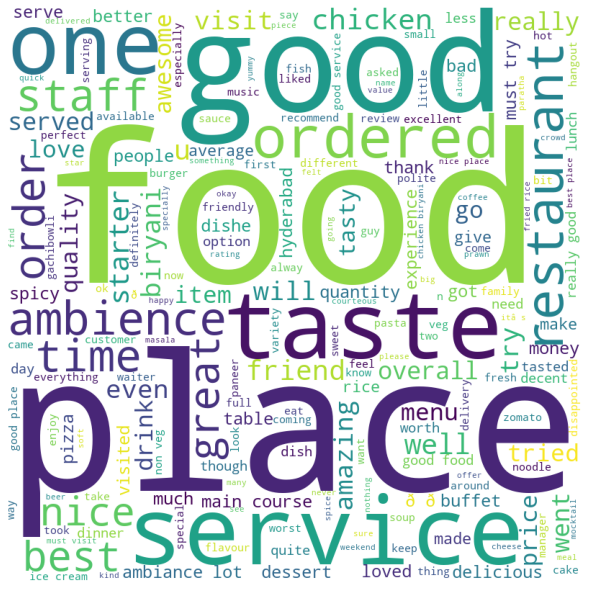

In [80]:
for i in range(0, len(df)):
    val = str(df["Review"][i])
 
    tokens = val.split()
     
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=9000) 
X = cv.fit_transform(corpus).toarray()

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_test)

In [118]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
restaurant_review_model = clf.fit(X_train, y_train)

In [119]:
y_pred = restaurant_review_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[2000]]
